# Imports

In [5]:
# %load first_cell.py
%reload_ext autoreload
%autoreload 2
from pathlib import Path
home = str(Path.home())

import sys
sys.path =  [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages']
sys.prefix = '/home/joaom/.conda/envs/norm_env'

# from paths import RAW_PATH, TREAT_PATH, OUTPUT_PATH, FIGURES_PATH

from copy import deepcopy
import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
import yaml
import matplotlib.pyplot as plt 
import datetime

import warnings
warnings.filterwarnings('ignore')

# Plotting
import plotly
import plotly.graph_objs as go
import cufflinks as cf
plotly.offline.init_notebook_mode(connected=True)

def iplottitle(title, width=40):
    return '<br>'.join(textwrap.wrap(title, width))

# Setting cufflinks
import textwrap
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import yaml
from jinja2 import Template
cf.themes.THEMES['custom'] = yaml.load(open('cufflinks_template.yaml', 'r'))

In [5]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path =  [f'{home}/.conda/envs/norm_env/lib/python37.zip', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/lib-dynload', 
                       f'{home}/.conda/envs/norm_env/lib/python3.7/site-packages', '../']

In [6]:
import awswrangler as wr
import pandas as pd
import boto3

In [7]:
session = boto3.Session(region_name='us-east-1')

In [23]:
df = pd.DataFrame([{'test': 3, 'partition': 'B'}])

In [20]:
bucket = 'iadbprod-public-stata-as-a-service'

In [24]:
res = wr.s3.to_parquet(
    df=df,
    path=f"s3://{bucket}/spd-sdv-omitnik-waze/corona/test/test",
    dataset=True,
    database="spd_sdv_waze_preprocessing_tests",
    table="test",
    mode="overwrite_partitions",
    partition_cols=['partition'],
    boto3_session=session
)

In [8]:
from src import utils
from datetime import datetime
conn = utils.connect_athena(path='../configs/athena.yaml')

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  athena_config = yaml.load(open(path, "r"))


In [12]:
df = pd.read_sql_query(
         "select * from "
        f"spd_sdv_waze_corona.dev_metadata_regions_metadata ", conn)

In [13]:
df.head()

,country_name,country_iso,region_slug,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun
0,Argentina,AR,buenosaires,Buenos Aires,city,14338718,TRUE,America/Argentina/Buenos_Aires,Polygon ((-58.75041764050466497 -34.3670848864...,FALSE
1,Argentina,AR,cordoba,Córdoba,city,1422824,TRUE,America/Argentina/Cordoba,Polygon ((-64.30875060953628974 -31.2754180085...,FALSE
2,Argentina,AR,mendoza,Mendoza,city,808809,TRUE,America/Argentina/Mendoza,Polygon ((-68.8337503129608308 -32.80875144662...,FALSE
3,Argentina,AR,rosario,Rosario,city,1018655,TRUE,America/Argentina/Cordoba,Polygon ((-60.71708417827297666 -32.8254181144...,FALSE
4,Bahamas,BS,nassau,New Providence,city,159211,FALSE,America/Nassau,Polygon ((-77.39166666669134997 25.03333333330...,FALSE


In [27]:
def get_timezone(x):
    
    coords = dict(zip(['lng', 'lat'], 
         [float(c) for c in x.split(',')[2].strip().split(' ')]))
    
    return tf.timezone_at(**coords)

df['timzone'] = df['region_shapefile_wkt'].apply(get_timezone)

In [30]:
df['timzone']

0      America/Argentina/Buenos_Aires
1           America/Argentina/Cordoba
2           America/Argentina/Mendoza
3           America/Argentina/Cordoba
4                      America/Nassau
                    ...              
192                  America/Santiago
193                    America/Bogota
194                    America/Bogota
195                      America/Lima
196                      America/Lima
Name: timzone, Length: 197, dtype: object

In [14]:
from timezonefinder import TimezoneFinder

tf = TimezoneFinder()
latitude, longitude = 52.5061, 13.358
tf.timezone_at(lng=longitude, lat=latitude)

'Europe/Berlin'

In [16]:
a = df['region_shapefile_wkt'].iloc[0]

In [45]:
selected = df.sort_values(by='region_slug')[:4]

In [46]:
selected['rerun'] = 4

In [47]:
df.update(selected[['region_slug', 'rerun']])

In [49]:
df

,country_name,country_iso,region_slug,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,timzone
54,Mexico,MX,aguascalientes,Aguascalientes,city,911397,TRUE,America/Mexico_City,Polygon ((-102.36708144846795676 21.9829189632...,4,America/Mexico_City
70,Peru,PE,arequipa,Arequipa,city,769625,TRUE,America/Lima,Polygon ((-71.52500000003252012 -16.3166666666...,4,America/Lima
69,Paraguay,PY,asuncion,Asuncion,city,2008545,TRUE,America/Argentina/Cordoba,Polygon ((-57.54208438636736389 -25.1754175918...,4,America/Asuncion
78,Venezuela,VE,barcelona,Barcelona,city,96561,FALSE,,Polygon ((-64.71429534637269398 10.22863350326...,4,America/Caracas
79,Venezuela,VE,barquisimeto,Barquisimeto,city,645094,FALSE,,Polygon ((-69.34208361297721979 10.12458481981...,FALSE,America/Caracas
...,...,...,...,...,...,...,...,...,...,...,...
64,Mexico,MX,tijuana,Tijuana,city,1690278,FALSE,America/Tijuana,Polygon ((-116.95874715877437211 32.4079196754...,FALSE,America/Tijuana
65,Mexico,MX,toluca,Toluca,city,1678241,TRUE,America/Mexico_City,Polygon ((-99.57541496477142573 19.44125212297...,FALSE,America/Mexico_City
66,Mexico,MX,torreon,Torreón,city,1098998,TRUE,America/Monterrey,Polygon ((-103.3920813812878805 25.64958588044...,FALSE,America/Monterrey
84,Venezuela,VE,valencia,Valencia,city,1615285,FALSE,,Polygon ((-68.04208369818121582 10.31625149957...,FALSE,America/Caracas


In [56]:
osm = pd.read_sql_query(
         "select * from "
        f"spd_sdv_waze_corona.prod_metadata_metadata_osm_length ", conn)

In [55]:
list(osm['timezone'])

['America/Santiago',
 'America/Panama',
 'America/Santiago',
 'America/Guayaquil',
 'America/Sao_Paulo',
 'America/Argentina/Mendoza',
 'America/Santiago',
 'America/Fortaleza',
 '',
 'America/Guatemala',
 'America/Bogota',
 'America/El_Salvador',
 'America/Santiago',
 'America/Santiago',
 'America/Sao_Paulo',
 'America/Santiago',
 'America/Santiago',
 'America/Costa_Rica',
 'America/Montevideo',
 'America/Santiago',
 '',
 'America/Santiago',
 '',
 'America/Argentina/Cordoba',
 'America/Manaus',
 'America/Guyana',
 'America/Fortaleza',
 'America/Santiago',
 '',
 '',
 'America/Santiago',
 '',
 'America/Montevideo',
 '',
 'America/Argentina/Buenos_Aires',
 '',
 'America/Santo_Domingo',
 'America/Sao_Paulo',
 '',
 '',
 'America/Santiago',
 'America/Santiago',
 '',
 'America/Sao_Paulo',
 'America/Santiago',
 '',
 'America/Santiago',
 'America/Bogota',
 'America/Sao_Paulo',
 'America/Lima',
 'America/Chile',
 'America/Paramaribo',
 'America/Mexico_City',
 '',
 'America/Asuncion',
 'America/

In [119]:
from dateutil import rrule
import yaml
import random

In [73]:
c = yaml.load("""
    start: 2019-01-01
    end: 2019-12-31
""")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  after removing the cwd from sys.path.


In [74]:
start, end = c['start'], c['end']

In [170]:
dates = pd.DataFrame([{'dt': dt, 'month': dt.month, 'week': dt.strftime("%V")} 
                      for dt in rrule.rrule(rrule.DAILY, dtstart=start, until=end)])
dates = dates[dates['week'].isin(dates.groupby('week').count().query('dt == 7').index)]


In [171]:
[dt.strftime("%Y%m%d") for dt in dates[
        dates["week"].isin(
            dates.groupby("month").apply(lambda x: x.sample())["week"].values
        )
    ]["dt"]]

['20190114',
 '20190115',
 '20190116',
 '20190117',
 '20190118',
 '20190119',
 '20190120',
 '20190204',
 '20190205',
 '20190206',
 '20190207',
 '20190208',
 '20190209',
 '20190210',
 '20190304',
 '20190305',
 '20190306',
 '20190307',
 '20190308',
 '20190309',
 '20190310',
 '20190422',
 '20190423',
 '20190424',
 '20190425',
 '20190426',
 '20190427',
 '20190428',
 '20190506',
 '20190507',
 '20190508',
 '20190509',
 '20190510',
 '20190511',
 '20190512',
 '20190624',
 '20190625',
 '20190626',
 '20190627',
 '20190628',
 '20190629',
 '20190630',
 '20190708',
 '20190709',
 '20190710',
 '20190711',
 '20190712',
 '20190713',
 '20190714',
 '20190819',
 '20190820',
 '20190821',
 '20190822',
 '20190823',
 '20190824',
 '20190825',
 '20190902',
 '20190903',
 '20190904',
 '20190905',
 '20190906',
 '20190907',
 '20190908',
 '20190930',
 '20191001',
 '20191002',
 '20191003',
 '20191004',
 '20191005',
 '20191006',
 '20191125',
 '20191126',
 '20191127',
 '20191128',
 '20191129',
 '20191130',
 '20191201',

In [4]:
import osm_road_length
sys.path.append('../')
from src import utils
from shapely import wkt
conn = utils.connect_athena(path='../configs/athena.yaml')

../src/utils.py:158: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  athena_config = yaml.load(open(path, "r"))


In [7]:
df = pd.read_sql_query(f"""
select 
    *
from spd_sdv_waze_corona.dev_metadata_metadata_ready
""", conn)

In [8]:
missing = df[df['osm_length'].isna()]

In [10]:
for i, row in missing.iterrows():
    
    print(row['region_slug'])
    road = osm_road_length.get(wkt.loads(row['region_shapefile_wkt']))

br_states_para
curitiba
lima_metro2
ch_comunas_san_jose_de_maipo


In [15]:
osm_highway_keys = [
    'motorway',
    'trunk',
    'primary',
    'secondary',
    'tertiary',
    'unclassified',
    'residential'
]

In [13]:
a = osm_road_length.get(wkt.loads(missing.iloc[0]['region_shapefile_wkt']))

In [17]:
a[a.index.isin(osm_highway_keys)]

,count,length
highway,,
primary,1929,5.644931e+06
residential,74487,2.587236e+07
secondary,2156,3.588718e+06
tertiary,5190,1.955014e+07
trunk,174,1.523599e+05
unclassified,23437,6.989959e+07


In [11]:
road

,count,length
highway,,
footway,29,15366.570
living_street,18,3596.339
path,131,246144.731
pedestrian,2,185.336
primary,71,66908.921
primary_link,2,97.569
residential,302,77146.421
secondary,14,22578.349
service,141,58154.815


In [243]:
def simplify(s, delta=0.005):
    
    while not check_length(s):
        s = s.simplify(delta, False)
        delta = delta + 0.005

    return s

def check_length(s, threshold=5000):
    
    return len(str(s)) < threshold

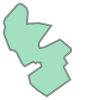

In [246]:
missing['region_shapefile_wkt'].apply(lambda x: simplify(wkt.loads(x))).iloc[0]

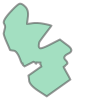

In [247]:
missing['region_shapefile_wkt'].apply(lambda x: wkt.loads(x)).iloc[0]

In [210]:
missing

,country_name,country_iso,region_slug,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,osm_length,idb_code,waze_code,country_name_idb_eng,region_shapefile_binary
20,Peru,PE,lima_metro2,Lima Bottom,submetro,6320659,FALSE,America/Lima,Polygon ((-77.19486998846033998 -11.8087874752...,FALSE,NaN,PE,PE,Peru,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00.\xda\xf...
94,Chile,CL,ch_comunas_san_jose_de_maipo,SAN JOSE DE MAIPO,submetro,18189,FALSE,America/Santiago,POLYGON ((-70.09166742561312 -33.0524240218649...,TRUE,NaN,CH,CI,Chile,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xd6\xf5...
121,Brasil,BR,br_states_para,Para,state,,FALSE,,POLYGON ((-54.95430669626876 2.583692423482197...,FALSE,NaN,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xf4\x06...
135,Brasil,BR,curitiba,Curitiba,city,2660649,TRUE,America/Sao_Paulo,Polygon ((-49.31708492544650824 -25.5754176191...,FALSE,NaN,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xe0\n\x...


In [188]:
missing['region_shapefile_wkt'].apply(lambda x: osm_road_length.get(wkt.loads(x)))

WARNING|%|s|,| |r|e|t|r|y|i|n|g| |i|n| |%|s| |s|e|c|o|n|d|s|.|.|.
WARNING|%|s|,| |r|e|t|r|y|i|n|g| |i|n| |%|s| |s|e|c|o|n|d|s|.|.|.
WARNING|%|s|,| |r|e|t|r|y|i|n|g| |i|n| |%|s| |s|e|c|o|n|d|s|.|.|.
WARNING|%|s|,| |r|e|t|r|y|i|n|g| |i|n| |%|s| |s|e|c|o|n|d|s|.|.|.


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [52]:
import traceback
e = ''
try:
    raise TypeError("Oups!")
except Exception as err:
    e = traceback.format_exc()
    try:
        raise TypeError("Again !?!")
    except:
        pass

    traceback.print_tb(err.__traceback__)

  File "<ipython-input-52-670466f45cdc>", line 4, in <module>
    raise TypeError("Oups!")


In [38]:
f = traceback.print_tb(e.__traceback__)

  File "<ipython-input-37-5af9349ca9d3>", line 4, in <module>
    raise TypeError("Oups!")


In [54]:
print(e)

Traceback (most recent call last):
  File "<ipython-input-52-670466f45cdc>", line 4, in <module>
    raise TypeError("Oups!")
TypeError: Oups!



In [51]:
a.tb_frame

<frame at 0x7f6a62912828, file '<ipython-input-37-5af9349ca9d3>', line 12, code <module>>

# Load Data

In [805]:
from src import utils
from datetime import datetime
conn = utils.connect_athena(path='../configs/athena.yaml')

In [807]:
# cities = ['São Paulo', 'Rio de Janeiro', 'Campinas']
# cities = "'"+"','".join(cities)+"'"

In [809]:
df = pd.read_sql_query("""
select 
    *
from spd_sdv_waze_corona.pipeline_test_daily_diff
""", conn)

In [810]:
daily = pd.read_sql_query(f"""
select 
   *
from spd_sdv_waze_corona.pipeline_test_daily_daily
where city in ({cities})
""", conn)

In [1330]:
historical = pd.read_sql_query(f"""
select 
    *
from spd_sdv_waze_corona.pipeline_test_historical_historical_2020
""", conn)

In [1281]:
daily = pd.read_sql_query(f"""
select 
    *
from spd_sdv_waze_corona.pipeline_test_historical_historical
where year = 2020
""", conn)

In [1276]:
cities = pd.read_sql_query(f"""
select 
    country, city, count(*) counta
from spd_sdv_waze_corona.pipeline_test_historical_historical_raw
where year = 2020
group by country, city
""", conn)

In [1279]:
cities.to_csv(RAW_PATH / 'waze_cities.csv')

In [1036]:
daily.head()

,country,country_iso,city,timezone,year,month,dow,day,hour,level,sum_length,city_slug
0,Perú,PE,Lima,America/Lima,2020,1,2,28,17,3,2516980,lima
1,Perú,PE,Lima,America/Lima,2020,3,4,12,3,2,541295,lima
2,Perú,PE,Lima,America/Lima,2020,2,6,29,16,4,1577080,lima
3,Perú,PE,Lima,America/Lima,2020,3,6,14,20,4,689532,lima
4,Perú,PE,Lima,America/Lima,2020,1,2,28,22,4,1672225,lima


In [1037]:
historical.head()

,country,country_iso,city,timezone,year,month,dow,day,hour,level,sum_length,city_slug
0,Brasil,BR,Campinas,America/Sao_Paulo,2019,1,5,18,22,4,38627,campinas
1,Brasil,BR,Campinas,America/Sao_Paulo,2019,1,5,18,18,4,84772,campinas
2,Brasil,BR,Campinas,America/Sao_Paulo,2019,1,4,31,21,3,195596,campinas
3,Brasil,BR,Campinas,America/Sao_Paulo,2019,1,4,17,20,4,114610,campinas
4,Brasil,BR,Campinas,America/Sao_Paulo,2019,2,6,2,11,3,93501,campinas


In [1078]:
holidays = yaml.load("""
- city: São Paulo
  holidays:
      - 2020-02-21
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2020-02-26
      - 2020-02-27
      - 2020-01-24
      - 2020-02-12
      - 2020-02-19
      - 2019-01-25
      - 2019-01-26
      - 2019-01-27
      - 2019-03-01
      - 2019-03-02
      - 2019-03-03
      - 2019-03-04
      - 2019-03-05
      - 2019-03-06
- city: Rio de Janeiro
  holidays:
      - 2020-01-20
      - 2020-01-19
      - 2020-01-18
      - 2020-02-21
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2020-02-26
      - 2020-02-27
      - 2020-02-28
      - 2020-02-29
      - 2020-02-12
      - 2020-02-19
      - 2019-03-01
      - 2019-03-02
      - 2019-03-03
      - 2019-03-04
      - 2019-03-05
      - 2019-03-06
- city: Campinas
  holidays: 
      - 2020-02-21
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2020-02-26
      - 2020-02-27
      - 2020-02-12
      - 2020-02-19
      - 2019-03-01
      - 2019-03-02
      - 2019-03-03
      - 2019-03-04
      - 2019-03-05
      - 2019-03-06
- city: Plano Piloto
  holidays: 
      - 2020-02-21
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2020-02-26
      - 2020-02-27
      - 2020-02-12
      - 2020-02-19
      - 2019-03-01
      - 2019-03-02
      - 2019-03-03
      - 2019-03-04
      - 2019-03-05
      - 2019-03-06
- city: Curitiba
  holidays: 
      - 2020-02-21
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2020-02-26
      - 2020-02-27
      - 2020-02-12
      - 2020-02-19
      - 2019-03-01
      - 2019-03-02
      - 2019-03-03
      - 2019-03-04
      - 2019-03-05
      - 2019-03-06
- city: Bogotá
  holidays:
      - 2020-01-06
      - 2019-01-07
      - 2020-02-12
      - 2020-02-19
- city: Zona Urbana Medellín
  holidays:
      - 2020-01-06
      - 2019-01-07
      - 2020-02-12
      - 2020-02-19
- city: Buenos Aires
  holidays:
      - 2020-02-22
      - 2020-02-23
      - 2020-02-24
      - 2020-02-25
      - 2019-02-22
      - 2019-02-23
      - 2019-02-24
      - 2019-02-25
      - 2020-02-12
      - 2020-02-19
- city: Lima
  holidays: 
      - 2020-02-12
      - 2020-02-19
""")

In [1079]:
def select_city(city):
    l = [h for h in holidays if h['city'] == city]
    if len(l):
        return l[0]['holidays']
    else:
        print(city)
        return []

holidays = pd.read_csv(RAW_PATH / 'holidays.csv')
holidays['date.iso'] = holidays['date.iso'].apply(pd.to_datetime)

In [1080]:
def filter_holiday(_df):
    return _df[_df[['city', 'datetime']].apply(lambda x: x['datetime'].to_pydatetime().date() 
                                       not in select_city(x['city']), 1)]

In [1081]:
def to_time(x, year):
    return datetime.strptime(f'{year}-{x["month"]}-{x["day"]}-{x["hour"]:02}', '%Y-%m-%d-%H')

In [1282]:
historical['datetime'] = historical.apply(lambda x: to_time(x, 2019), 1)
daily['datetime'] = daily.apply(lambda x: to_time(x, 2020), 1)
daily['workday'] = pd.cut(daily['dow'], [0, 5, 7], labels=[True, False])
historical['workday'] = pd.cut(historical['dow'], [0, 5, 7], labels=[True, False])

In [1283]:
daily = filter_holiday(daily)
historical = filter_holiday(historical)

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia 

Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quit

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de S

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia 

Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia 

Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quit

Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quit

Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quito
Quit

Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Quito
Quit

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horizonte
Belo Horiz

Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia de Santiago
Provincia 

In [1084]:
daily = daily[daily['datetime'] > '2020-01-10']
historical = historical[historical['datetime'] > '2019-01-10']

In [1163]:
daily.pivot_table(index='datetime', columns='city', values='sum_length')\
.resample('D').sum()\
.iplot(theme='custom',
          title=f'Total Jam Length per Day in 2020 (every 5 minutes)',
          yTitle='meters', 
          kind='bar'
          )

In [1086]:
historical[historical['datetime'] < "2019-03-15"].pivot_table(index='datetime', columns='city', values='sum_length')\
.resample('D').sum()\
.iplot(theme='custom',
          title=f'Total Jam Length per Day in 2019 (every 5 minutes)',
          yTitle='meters', 
          )

# Compare 

In [1160]:
def get_days(_df):
    _df = _df.groupby(['city', 'month', 'dow', 'day', 'workday', 'hour'])['sum_length'].sum().reset_index()
    _df = _df.groupby(['city', 'month', 'dow', 'day', 'workday'])['sum_length'].agg(['count', 'sum'])
    indexs = list(_df.index.names )
    _df = _df.reset_index()
    return _df[(_df['count'] == 24) & (_df['month'] < 3)]\
        .sort_values(by=['city','month', 'day'])[['count', 'sum'] + indexs]

In [1161]:
def get_sum(_df):
    _df = get_days(_df)
    return _df.groupby(['city', 'dow']).mean()['sum']

In [1162]:
adjustment = pd.concat([get_sum(daily), get_sum(historical)], 1)
adjustment.columns = ['2020', '2019']
adjustment['2020/2019'] = adjustment['2020'] / adjustment['2019']
adjustment['2020 - 2019'] = adjustment['2020'] - adjustment['2019']
adjustment

,,2020,2019,2020/2019,2020 - 2019
city,dow,,,,


In [1194]:
import pytz

In [1243]:
def to_timezone(_df):
    
    return _df.apply(lambda x: x['datetime'].replace(tzinfo=pytz.utc)\
            .astimezone(pytz.timezone(x['timezone'])).replace(tzinfo=None), 1)

In [1284]:
daily['datetime'] = to_timezone(daily)
historical['datetime'] = to_timezone(historical)

In [1285]:
daily['daytime'] = daily['datetime'].apply(lambda x: x.hour > 6 & x.hour < 20).replace(to_replace={True: 'daytime', False: 'nighttime'})
historical['daytime'] = historical['datetime'].apply(lambda x: x.hour > 6 & x.hour < 20).replace(to_replace={True: 'daytime', False: 'nighttime'})

In [1286]:
expected = daily[(daily['datetime'] > '2020-03-02') &
           (daily['datetime'] < '2020-03-10')]\
    .groupby(['city', 'dow'])['sum_length'].sum().reset_index()

In [1287]:
expected = historical[(historical['datetime'] >= '2019-03-07') &
           (historical['datetime'] <= '2019-04-30')]\
    .groupby(['city', 'dow', 'day'])['sum_length'].sum().reset_index()\
    .groupby(['city', 'dow'])['sum_length'].mean().reset_index()

In [1323]:
expected = daily[(daily['datetime'] <= '2020-03-08')]\
    .groupby(['city', 'dow'])['sum_length'].sum().reset_index()

In [1324]:
# g = historical.query('month < 3').groupby(['city', 'month', 'dow', 'day', 'workday'])[['sum_length']].sum().reset_index()
# expected = g.groupby(['city', 'dow'])[['sum_length']].mean().reset_index()

seen = daily[(daily['datetime'] >= '2020-03-09')]\
             .groupby(['city', 'month', 'dow', 'day' ])[['sum_length']].sum().reset_index()

df = expected.merge(seen, on=['city', 'dow'], suffixes=('_expected', '_seen'), how='left')
# df = df.merge(adjustment.reset_index(), on=['city', 'dow'])

df['ratio'] = df['sum_length_seen'] / df['sum_length_expected']  * 100

df['date'] = df.dropna(subset=['month', 'day']).apply(lambda x: datetime.strptime(f'2020-{int(x["month"])}-{int(x["day"]):02}', '%Y-%m-%d'), 1)

In [1327]:
df[['city', 'date', 'dow', 'month', 'day', 'ratio']].to_csv(OUTPUT_PATH / 'index_example.csv')

In [1328]:
for c in df['city'].unique():

    df.query(f'city == "{c}"')\
    .pivot_table(index='date', columns='daytime', values='ratio')\
    .iplot(theme='custom', title=iplottitle(f'Traffic Variation from 1st Week March          {c}'),
          yTitle='',
               asImage=True
          )

KeyError: 'daytime'

# Compare same year previous weeks

In [141]:
ref = daily[(daily['datetime'] < '2020-03-07') & (daily['datetime'] > '2020-02-01')]

In [142]:
ref = ref.groupby(['city', 'dow', 'hour'])[['sum_length']].median().reset_index()

In [143]:
ref['datetime'] = ref.apply(lambda x: datetime.strptime(f'{x["dow"]}-{x["hour"]:02}', '%d-%H'), 1)

In [144]:
ref.pivot_table(index='datetime', columns='city', values='sum_length')\
     .iplot(theme='custom',
          title=f'Mean Jam Length per Hour per Weekday for Month {m}',
          yTitle='meters', 
          )

In [147]:
comp = daily[(daily['datetime'] > '2020-03-07')]

In [148]:
comp['datetime'] = comp.apply(lambda x: datetime.strptime(f'{x["dow"]}-{x["hour"]:02}', '%d-%H'), 1)

In [149]:
comp.pivot_table(index='datetime', columns='city', values='sum_length')\
     .iplot(theme='custom',
          title=f'Mean Jam Length per Hour per Weekday for Month {m}',
          yTitle='meters', 
          )

In [34]:
df['historical'] = df.apply(lambda x: datetime.strptime(f'{x["month"]}-{x["dow"]}-{x["hour"]:02}', '%m-%d-%H'), 1)

In [48]:
df['daily'] = df.apply(lambda x: datetime.strptime(f'2020-{x["month"]}-{x["day"]}-{x["hour"]:02}', '%Y-%m-%d-%H'), 1)

In [56]:
daily = df[['daily', 'city', 'day_length', 'month']]

daily.pivot_table(index='daily', columns='city', values='day_length')\
    .iplot(theme='custom',
          title=f'Mean Jam Length per Hour per Weekday for Month {m}',
          yTitle='meters', 
          )

In [42]:
hist = df[['historical', 'city', 'avg_length', 'month']].drop_duplicates()

for m in hist['month'].unique():
    hist.query(f'month == {m}')\
    .pivot_table(index='historical', columns='city', values='avg_length')\
    .iplot(theme='custom',
          title=f'Mean Jam Length per Hour per Weekday for Month {m}',
          yTitle='meters'
          )

In [55]:
from h3 import h3
import geojson
from shapely import wkt

In [107]:
daily = pd.read_csv('https://docs.google.com/spreadsheets/d/1xBDV5Zm7zSRPK2TGBoVSHhkvPeqRT9hZFiD4AueoVeI/gviz/tq?tqx=out:csv&sheet=daily')

In [108]:
daily['timestamp'] = daily.apply(lambda x: pd.to_datetime(f'2020-{x["month"]}-{x["day"]}'), 1)

In [109]:
daily.query('region_type == "state"')[['timestamp', 'region_name', 'tcp', 'region_slug']]\
    .merge(metadata[['region_slug', 'region_shapefile_wkt']], on='region_slug')\
    .to_csv('states_brasil.csv')

In [123]:
baseline = daily.drop_duplicates(subset=['region_slug', 'dow', 'expected_2020'])

In [135]:
baseline['timestamp'] = baseline.apply(lambda x: pd.to_datetime(f'2020-03-{x["dow"] + 1}'), 1)

In [138]:
baseline['observed'] = baseline['expected_2020']

In [140]:
df = pd.concat([daily, baseline])

In [164]:
fig = df.query('region_slug in ("saopaulo", "lima", "quito")')\
    .pivot_table(index='timestamp', columns='region_name', values='observed').sort_index()\
    .iplot(theme='custom', width=3, 
           title='TCI per City', 
           yTitle='TCI',
           asFigure=True)

fig.update_layout(
    legend=dict(
        x=0.75,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=18,
            color="black"
        ),
#         bgcolor="White",
#         bordercolor="Black"
#         borderwidth=1
    )
)

fig

In [187]:
fig = df.query('region_slug in ("saopaulo")')\
    .pivot_table(index='timestamp', columns='region_name', values='observed').sort_index()\
    .iplot(theme='custom', width=3, 
           title='TCI per City', 
           yTitle='TCI', color='#37a35f',
           asFigure=True)

fig.update_layout(
    legend=dict(
        x=0.75,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=18,
            color="black"
        ),
#         bgcolor="White",
#         bordercolor="Black"
#         borderwidth=1
    )
)

fig

In [167]:
fig = daily.query('region_slug in ("saopaulo", "lima", "quito")')\
    .pivot_table(index='timestamp', columns='region_name', values='tcp').sort_index()\
    .iplot(theme='custom', width=3, 
           title='TCI Percentage Change per City', 
           yTitle='TCI Percentage Change',
           asFigure=True)

fig.update_layout(
    xaxis=dict(
        zeroline=False
    ),
    legend=dict(
        x=0.75,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=18,
            color="black"
        ),
    )
)

fig

In [176]:
daily.sort_values('timestamp')[:7]
# .query('region_slug in ("quito")')\
#     .set_index('dow')[['expected_2020', 'observed']].sort_index()

,last_updated_utc,region_slug,region_name,country_name,country_iso_code,country_idb_code,region_type,population,timezone,month,day,dow,observed,expected_2019,expected_2020,ratio_19,ratio_20,tcp,dashboard,Unnamed: 19,timestamp
4241,2020-04-28 10:59:14.502000,panamacity,Ciudad de Panamá,Panama,PA,PN,city,1061613.0,America/Panama,3,9,1,22628441.0,2.433237e+07,23068253.0,0.929973,0.980934,-1.906568,True,NaN,2020-03-09
5479,2020-04-28 10:59:14.502000,joaopessoa,João Pessoa,Brazil,BR,BR,city,1020103.0,America/Fortaleza,3,9,1,6180520.0,6.686884e+06,6412325.0,0.924275,0.963850,-3.614991,True,NaN,2020-03-09
1073,2020-04-28 10:59:14.502000,country_chile,Chile,Chile,CL,CH,country,19116209.0,America/Santiago,3,9,1,203897168.0,1.590973e+08,190820658.0,1.281588,1.068528,6.852775,True,NaN,2020-03-09
2436,2020-04-28 10:59:14.502000,country_honduras,Honduras,Honduras,HN,HO,country,9904608.0,America/Tegucigalpa,3,9,1,10006895.0,5.735172e+06,8341709.0,1.744829,1.199622,19.962168,True,NaN,2020-03-09
5502,2020-04-28 10:59:14.502000,br_states_sao_paulo,Sao Paulo,Brazil,BR,BR,state,NaN,NaN,3,9,1,317366520.0,3.272389e+08,317035990.0,0.969831,1.001043,0.104256,False,NaN,2020-03-09
3116,2020-04-28 10:59:14.502000,goiania,Goiânia,Brazil,BR,BR,city,1863305.0,America/Sao_Paulo,3,9,1,15689812.0,1.460649e+07,20385093.0,1.074167,0.769671,-23.032914,True,NaN,2020-03-09
5519,2020-04-28 10:59:14.502000,country_colombia,Colombia,Colombia,CO,CO,country,50882884.0,America/Bogota,3,9,1,235742927.0,1.924193e+08,249815054.0,1.225152,0.943670,-5.633018,True,NaN,2020-03-09


In [178]:
fig = daily.query('region_slug in ("quito")').sort_values('timestamp')[7:14]\
    .set_index('dow')[['expected_2020', 'observed']].sort_index()\
    .iplot(theme='custom', width=3, 
           title='TCI Percentage Change per City', 
           yTitle='TCI Percentage Change',
           fill=True,
           asFigure=True)

fig.update_layout(
    xaxis=dict(
        zeroline=False
    ),
    legend=dict(
        x=0.75,
        y=1,
        traceorder="normal",
        font=dict(
            family="sans-serif",
            size=18,
            color="black"
        ),
    )
)

fig

In [111]:
daily.iplot()

,last_updated_utc,region_slug,region_name,country_name,country_iso_code,country_idb_code,region_type,population,timezone,month,day,dow,observed,expected_2019,expected_2020,ratio_19,ratio_20,tcp,dashboard,Unnamed: 19,timestamp
0,2020-04-28 10:59:14.502000,saopaulo,São Paulo,Brazil,BR,BR,city,21001688.0,America/Sao_Paulo,4,14,2,25895360.0,2.247227e+08,191378506.0,0.115232,0.135310,-86.469034,True,NaN,2020-04-14
1,2020-04-28 10:59:14.502000,saopaulo,São Paulo,Brazil,BR,BR,city,21001688.0,America/Sao_Paulo,4,7,2,38159422.0,2.247227e+08,191378506.0,0.169807,0.199392,-80.060759,True,NaN,2020-04-07
2,2020-04-28 10:59:14.502000,saopaulo,São Paulo,Brazil,BR,BR,city,21001688.0,America/Sao_Paulo,3,17,2,99845968.0,2.247227e+08,191378506.0,0.444307,0.521720,-47.828014,True,NaN,2020-03-17
3,2020-04-28 10:59:14.502000,bucaramanga,Bucaramanga,Colombia,CO,CO,city,981459.0,America/Bogota,3,29,7,125718.0,1.396514e+06,2491098.0,0.090023,0.050467,-94.953310,True,NaN,2020-03-29
4,2020-04-28 10:59:14.502000,bucaramanga,Bucaramanga,Colombia,CO,CO,city,981459.0,America/Bogota,3,15,7,2125363.0,1.396514e+06,2491098.0,1.521907,0.853183,-14.681679,True,NaN,2020-03-15


In [7]:
%reload_ext autoreload
%autoreload 2

ModuleNotFoundError: spec not found for the module 'autoreload'

In [8]:
sys.path.append('../')
from src import utils
import numpy as np
conn = utils.connect_athena(path='../configs/athena.yaml')

In [186]:
config = utils.get_config('../configs/config-template.yaml')

In [280]:
data = pd.read_sql_query("""
select 
    *
from spd_sdv_waze_corona.dev_analysis_metadata_variation
""", conn)

In [ ]:
data = pd.read_sql_query("""
select 
    *
from spd_sdv_waze_corona.dev_daily_daily
""", conn)

In [281]:
def get_hours(_df, data):
    
    return pd.DataFrame(
        [{'date_filter': '|'.join([d.tz_localize(timezone, ambiguous=False, nonexistent='shift_backward').astimezone('UTC').strftime('%Y%m%d%H') 
                                       for d in list(_df['date'])]),
      'from_table': _df['from_table'].unique()[0],
      'timezone': timezone}
        for timezone in data['timezone'].unique()])

In [282]:
dates = pd.Series(
        utils.get_query_dates(
            config['daily_interval']['start'], 
            config['daily_interval']['end']),
        name='date').to_frame()

dates['from_table'] = np.where(dates['date'] < pd.to_datetime(config['daily_table']['break_date']),
                          config['daily_table']['before'], 
                          config['daily_table']['after'])

dates['date_slug'] = dates['date'].apply(lambda x: x.strftime(config["daily_aggregation"]))

dates = dates.groupby('date_slug').apply(lambda x: get_hours(x, data)).reset_index().drop('level_1', 1)

In [283]:
data = pd.merge(data, dates, on='timezone')

In [292]:
existing_dates = pd.read_sql_query("""
select distinct 
	region_slug, 
	date_parse(concat(cast(year as varchar), '-', cast(month as varchar), '-', cast(day as varchar)), '%Y-%m-%d') date
from spd_sdv_waze_corona.dev_daily_daily
""", conn)

In [293]:
existing_dates

,region_slug,date
0,lima,2020-03-25
1,saopaulo,2020-03-28
2,lima,2020-04-08
3,saopaulo,2020-04-18
4,buenosaires,2020-03-22
...,...,...
295,bogota,2020-04-23
296,campinas,2020-03-25
297,campinas,2020-04-01
298,campinas,2020-05-01


In [312]:
dates = pd.Series(
        utils.get_query_dates(
            config["daily_interval"]["start"], config["daily_interval"]["end"]
        ),
        name="timestamp",
    ).to_frame()

In [313]:
dates["date"] = dates["timestamp"].apply(lambda x: x.date())

In [320]:
dates.groupby('date').filter(lambda x: len(x) == 24)['date'].unique()

array([datetime.date(2020, 3, 9), datetime.date(2020, 3, 10),
       datetime.date(2020, 3, 11), datetime.date(2020, 3, 12),
       datetime.date(2020, 3, 13), datetime.date(2020, 3, 14),
       datetime.date(2020, 3, 15), datetime.date(2020, 3, 16),
       datetime.date(2020, 3, 17), datetime.date(2020, 3, 18),
       datetime.date(2020, 3, 19), datetime.date(2020, 3, 20),
       datetime.date(2020, 3, 21), datetime.date(2020, 3, 22),
       datetime.date(2020, 3, 23), datetime.date(2020, 3, 24),
       datetime.date(2020, 3, 25), datetime.date(2020, 3, 26),
       datetime.date(2020, 3, 27), datetime.date(2020, 3, 28),
       datetime.date(2020, 3, 29), datetime.date(2020, 3, 30),
       datetime.date(2020, 3, 31), datetime.date(2020, 4, 1),
       datetime.date(2020, 4, 2), datetime.date(2020, 4, 3),
       datetime.date(2020, 4, 4), datetime.date(2020, 4, 5),
       datetime.date(2020, 4, 6), datetime.date(2020, 4, 7),
       datetime.date(2020, 4, 8), datetime.date(2020, 4, 9),
  

In [302]:
def get_remaining_dates(d):
    
    dates['date'] = dates['timestamp'].apply(lambda x: x.date())
    
    return dates[~dates['date'].isin(d['date'].apply(lambda x: x.date()))][['date']].drop_duplicates()

In [303]:
remaining_dates = existing_dates.groupby('region_slug').apply(get_remaining_dates)

In [304]:
remaining_dates['date_slug'] = remaining_dates['date'].apply(lambda x: x.strftime(config["daily_aggregation"]))

In [307]:
remaining_dates = remaining_dates.reset_index()[['region_slug', 'date_slug']].drop_duplicates()

In [311]:
pd.concat([data.merge(
    remaining_dates,
    on=['region_slug', 'date_slug']),
 data[~data['region_slug'].isin(remaining_dates['region_slug'])]])

,country_name,country_iso,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,region_slug,osm_length,idb_code,waze_code,country_name_idb_eng,region_shapefile_binary,area,n_days,daily_mean,daily_std,weekly_mean,weekly_std,daily_coef_var,daily_mean_weekend,daily_std_weekend,daily_coef_var_weekend,daily_mean_weekday,daily_std_weekday,daily_coef_var_weekday,daily_osm_ratio,weekend_osm_ratio,weekday_osm_ratio,weekly_osm_ratio,daily_approved,weekly_approved,date_slug,date_filter,from_table
0,Colombia,CO,Bogotá,city,8770058,TRUE,America/Bogota,Polygon ((-74.04208330493199242 4.932917798462...,FALSE,bogota,8.377317e+06,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\x04\x01...,0.071528,365,1.051851e+08,3.251308e+07,7.243876e+08,1.633356e+08,0.309104,9.196805e+07,3.589238e+07,0.390270,1.106088e+08,2.940296e+07,0.319708,12.555935,10.978223,13.203365,12.352874,True,True,year2020week18,2020050405|2020050406|2020050407|2020050408|20...,"""p-waze-parquet-waze"".""jams"""
1,Colombia,CO,Bogotá,city,8770058,TRUE,America/Bogota,Polygon ((-74.04208330493199242 4.932917798462...,FALSE,bogota,8.377317e+06,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\x04\x01...,0.071528,365,1.051851e+08,3.251308e+07,7.243876e+08,1.633356e+08,0.309104,9.196805e+07,3.589238e+07,0.390270,1.106088e+08,2.940296e+07,0.319708,12.555935,10.978223,13.203365,12.352874,True,True,year2020week19,2020051105|2020051106|2020051107|2020051108|20...,"""p-waze-parquet-waze"".""jams"""
2,Argentina,AR,Buenos Aires,city,14338718,TRUE,America/Argentina/Buenos_Aires,Polygon ((-58.75041764050466497 -34.3670848864...,FALSE,buenosaires,3.033681e+07,AR,AR,Argentina,b'\x00\x00\x00\x00\x03\x05\x00\x00\x002I\x19|\...,0.208194,365,7.798431e+07,2.652180e+07,5.370618e+08,1.214348e+08,0.340092,5.529966e+07,1.364060e+07,0.246667,8.718882e+07,2.486060e+07,0.449562,2.570617,1.822857,2.874027,2.529044,True,True,year2020week18,2020050403|2020050404|2020050405|2020050406|20...,"""p-waze-parquet-waze"".""jams"""
3,Argentina,AR,Buenos Aires,city,14338718,TRUE,America/Argentina/Buenos_Aires,Polygon ((-58.75041764050466497 -34.3670848864...,FALSE,buenosaires,3.033681e+07,AR,AR,Argentina,b'\x00\x00\x00\x00\x03\x05\x00\x00\x002I\x19|\...,0.208194,365,7.798431e+07,2.652180e+07,5.370618e+08,1.214348e+08,0.340092,5.529966e+07,1.364060e+07,0.246667,8.718882e+07,2.486060e+07,0.449562,2.570617,1.822857,2.874027,2.529044,True,True,year2020week19,2020051103|2020051104|2020051105|2020051106|20...,"""p-waze-parquet-waze"".""jams"""
4,Brasil,BR,Campinas,city,2034299,TRUE,America/Sao_Paulo,Polygon ((-47.31708505652957797 -22.6837507549...,FALSE,campinas,7.438591e+06,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xf68<O\...,0.053125,365,1.132932e+07,4.591201e+06,7.802269e+07,1.822204e+07,0.405249,6.183014e+06,1.951667e+06,0.315650,1.342120e+07,3.578999e+06,0.578844,1.523047,0.831208,1.804266,1.498415,True,True,year2020week18,2020050403|2020050404|2020050405|2020050406|20...,"""p-waze-parquet-waze"".""jams"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4.426804e+06,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385,1.128141,1.460325,1.342320,True,True,year2020week15,2020041305|2020041306|2020041307|2020041308|20...,"""p-waze-parquet-waze"".""jams"""
1386,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4.426804e+06,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385

,country_name,country_iso,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,region_slug,osm_length,idb_code,waze_code,country_name_idb_eng,region_shapefile_binary,area,n_days,daily_mean,daily_std,weekly_mean,weekly_std,daily_coef_var,daily_mean_weekend,daily_std_weekend,daily_coef_var_weekend,daily_mean_weekday,daily_std_weekday,daily_coef_var_weekday,daily_osm_ratio,weekend_osm_ratio,weekday_osm_ratio,weekly_osm_ratio,daily_approved,weekly_approved,date_slug,date_filter,from_table
0,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week10,2020030905|2020030906|2020030907|2020030908|20...,spd_sdv_waze_reprocessed.jams_ready
1,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week11,2020031605|2020031606|2020031607|2020031608|20...,"""p-waze-parquet-waze"".""jams"""
2,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week12,2020032305|2020032306|2020032307|2020032308|20...,"""p-waze-parquet-waze"".""jams"""
3,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week13,2020033005|2020033006|2020033007|2020033008|20...,"""p-waze-parquet-waze"".""jams"""
4,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week14,2020040605|2020040606|2020040607|2020040608|20...,"""p-waze-parquet-waze"".""jams"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4426804.223,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385,1.128141,1.460325,1.342320,True,True,year2020week15,2020041305|2020041306|2020041307|2020041308|20...,"""p-waze-parquet-waze"".""jams"""
1386,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4426804.223,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385,1.128141,1.46032

In [284]:
data

,country_name,country_iso,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,region_slug,osm_length,idb_code,waze_code,country_name_idb_eng,region_shapefile_binary,area,n_days,daily_mean,daily_std,weekly_mean,weekly_std,daily_coef_var,daily_mean_weekend,daily_std_weekend,daily_coef_var_weekend,daily_mean_weekday,daily_std_weekday,daily_coef_var_weekday,daily_osm_ratio,weekend_osm_ratio,weekday_osm_ratio,weekly_osm_ratio,daily_approved,weekly_approved,date_slug,date_filter,from_table
0,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week10,2020030905|2020030906|2020030907|2020030908|20...,spd_sdv_waze_reprocessed.jams_ready
1,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week11,2020031605|2020031606|2020031607|2020031608|20...,"""p-waze-parquet-waze"".""jams"""
2,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week12,2020032305|2020032306|2020032307|2020032308|20...,"""p-waze-parquet-waze"".""jams"""
3,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week13,2020033005|2020033006|2020033007|2020033008|20...,"""p-waze-parquet-waze"".""jams"""
4,Colombia,CO,Barranquilla,city,1931750,TRUE,America/Bogota,Polygon ((-74.83374991971160739 11.04958488300...,FALSE,barranquilla,2609150.590,CO,CO,Colombia,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xdc-W\x...,0.020000,365,1.168939e+07,3.698417e+06,8.050237e+07,1.523369e+07,0.316391,8.680727e+06,3.559313e+06,0.410025,1.290203e+07,3.003583e+06,0.346006,4.480150,3.327032,4.944915,4.407695,True,True,year2020week14,2020040605|2020040606|2020040607|2020040608|20...,"""p-waze-parquet-waze"".""jams"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1385,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4426804.223,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385,1.128141,1.460325,1.342320,True,True,year2020week15,2020041305|2020041306|2020041307|2020041308|20...,"""p-waze-parquet-waze"".""jams"""
1386,Mexico,MX,Mérida,city,980031,TRUE,America/Merida,Polygon ((-89.66708228084547727 21.08291890179...,FALSE,merida,4426804.223,ME,MX,Mexico,"b""\x00\x00\x00\x00\x03\x05\x00\x00\x00q\x91 \x...",0.023542,365,6.039867e+06,1.962740e+06,4.159531e+07,9.243961e+06,0.324964,4.994058e+06,1.654383e+06,0.331270,6.464571e+06,1.919601e+06,0.384377,1.364385,1.128141,1.46032

In [187]:
existing_dates['date_slug'] = existing_dates['date'].apply(lambda x: x.strftime(config["daily_aggregation"]))

0      year2020week12
1      year2020week12
2      year2020week15
3      year2020week14
4      year2020week13
            ...      
295    year2020week14
296    year2020week10
297    year2020week10
298    year2020week14
299    year2020week10
Name: dates, Length: 300, dtype: object

In [324]:
def get_current_millis():

pd.read_sql_query("""
select split("$path", '/')[7] current_millis from spd_sdv_waze_corona.dev_daily_daily limit 1""", conn)['current_millis'][0]


d

'v4'

In [110]:
import pytz

In [168]:
pd.to_datetime('2020-03-21 23:00:00').tz_localize('America/Sao_Paulo', ambiguous=False).astimezone('UTC')

Timestamp('2020-03-22 02:00:00+0000', tz='UTC')

In [118]:
a.tz_localize()

Timestamp('2020-03-08 21:00:00-0300', tz='America/Sao_Paulo')

array(['America/Guyana', 'America/Fortaleza', 'America/Guatemala',
       'America/Sao_Paulo', 'America/Caracas', 'America/Bahia',
       'America/Paramaribo', 'America/Recife', 'America/Cancun',
       'America/Hermosillo', 'America/Tegucigalpa', 'America/Santiago',
       'America/Argentina/Mendoza', 'America/Bogota',
       'America/El_Salvador', 'America/Monterrey', 'America/Rio_Branco',
       'America/La_Paz', 'America/Mexico_City', 'America/Port_of_Spain',
       'America/Ojinaga', 'America/Costa_Rica', 'America/Manaus',
       'America/Guayaquil', 'America/Barbados', 'America/Cuiaba',
       'America/Maceio', 'America/Tijuana', 'America/Porto_Velho',
       'America/Lima', 'America/Jamaica', 'America/Belize',
       'America/Panama', 'America/Argentina/Cordoba',
       'America/Santo_Domingo', 'America/Asuncion', 'America/Montevideo',
       'America/Merida', 'America/Belem', 'America/Managua',
       'America/Port-au-Prince', 'America/New_York', 'America/Nassau',
       'Ameri

In [70]:
crossjoin(data, dates)

,country_name,country_iso,region_name,region_type,population,dashboard,timezone,region_shapefile_wkt,rerun,region_slug,osm_length,idb_code,waze_code,country_name_idb_eng,region_shapefile_binary,area,n_days,daily_mean,daily_std,weekly_mean,weekly_std,daily_coef_var,daily_mean_weekend,daily_std_weekend,daily_coef_var_weekend,daily_mean_weekday,daily_std_weekday,daily_coef_var_weekday,daily_osm_ratio,weekend_osm_ratio,weekday_osm_ratio,weekly_osm_ratio,daily_approved,weekly_approved,date,from_table,date_slug
0,Brasil,BR,Roraima,state,,FALSE,America/Guyana,POLYGON ((-60.20050657607426 5.264343437750694...,FALSE,br_states_roraima,1.476987e+07,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xcd\xd7...,18.266841,365,1.751681e+06,6.173403e+05,1.206346e+07,3.293043e+06,0.352427,1.509441e+06,5.427588e+05,0.359576,1.851678e+06,6.174240e+05,0.409041,0.118598,0.102197,0.125369,0.116680,True,True,2020-03-09,spd_sdv_waze_reprocessed.jams_ready,year2020day0309
1,Brasil,BR,Roraima,state,,FALSE,America/Guyana,POLYGON ((-60.20050657607426 5.264343437750694...,FALSE,br_states_roraima,1.476987e+07,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xcd\xd7...,18.266841,365,1.751681e+06,6.173403e+05,1.206346e+07,3.293043e+06,0.352427,1.509441e+06,5.427588e+05,0.359576,1.851678e+06,6.174240e+05,0.409041,0.118598,0.102197,0.125369,0.116680,True,True,2020-03-10,spd_sdv_waze_reprocessed.jams_ready,year2020day0310
2,Brasil,BR,Roraima,state,,FALSE,America/Guyana,POLYGON ((-60.20050657607426 5.264343437750694...,FALSE,br_states_roraima,1.476987e+07,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xcd\xd7...,18.266841,365,1.751681e+06,6.173403e+05,1.206346e+07,3.293043e+06,0.352427,1.509441e+06,5.427588e+05,0.359576,1.851678e+06,6.174240e+05,0.409041,0.118598,0.102197,0.125369,0.116680,True,True,2020-03-11,spd_sdv_waze_reprocessed.jams_ready,year2020day0311
3,Brasil,BR,Roraima,state,,FALSE,America/Guyana,POLYGON ((-60.20050657607426 5.264343437750694...,FALSE,br_states_roraima,1.476987e+07,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xcd\xd7...,18.266841,365,1.751681e+06,6.173403e+05,1.206346e+07,3.293043e+06,0.352427,1.509441e+06,5.427588e+05,0.359576,1.851678e+06,6.174240e+05,0.409041,0.118598,0.102197,0.125369,0.116680,True,True,2020-03-12,spd_sdv_waze_reprocessed.jams_ready,year2020day0312
4,Brasil,BR,Roraima,state,,FALSE,America/Guyana,POLYGON ((-60.20050657607426 5.264343437750694...,FALSE,br_states_roraima,1.476987e+07,BR,BR,Brazil,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xcd\xd7...,18.266841,365,1.751681e+06,6.173403e+05,1.206346e+07,3.293043e+06,0.352427,1.509441e+06,5.427588e+05,0.359576,1.851678e+06,6.174240e+05,0.409041,0.118598,0.102197,0.125369,0.116680,True,True,2020-03-13,spd_sdv_waze_reprocessed.jams_ready,year2020day0313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,Peru,PE,Lima,city,9609692,TRUE,America/Lima,Polygon ((-77.16708310011469507 -11.7004166712...,FALSE,lima,1.713717e+07,PE,PE,Peru,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xd8vp\x...,0.175625,365,7.779755e+07,1.941446e+07,5.357756e+08,8.329527e+07,0.249551,6.266087e+07,2.013410e+07,0.321319,8.388267e+07,1.542950e+07,0.246238,4.539697,3.656431,4.894780,4.466279,True,True,2020-05-03,"""p-waze-parquet-waze"".""jams""",year2020day0503
8336,Peru,PE,Lima,city,9609692,TRUE,America/Lima,Polygon ((-77.16708310011469507 -11.7004166712...,FALSE,lima,1.713717e+07,PE,PE,Peru,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xd8vp\x...,0.175625,365,7.779755e+07,1.941446e+07,5.357756e+08,8.329527e+07,0.249551,6.266087e+07,2.013410e+07,0.321319,8.388267e+07,1.542950e+07,0.246238,4.539697,3.656431,4.894780,4.466279,True,True,2020-05-04,"""p-waze-parquet-waze"".""jams""",year2020day0504
8337,Peru,PE,Lima,city,9609692,TRUE,America/Lima,Polygon ((-77.16708310011469507 -11.7004166712...,FALSE,lima,1.713717e+07,PE,PE,Peru,b'\x00\x00\x00\x00\x03\x05\x00\x00\x00\xd8vp\x...,0.175625,365,7.779755

In [330]:
import requests

In [331]:
requests.get('https://www.radarbox.com/search/active/flights?page=2&q=&maxdeps=1589295880')

<Response [403]>

In [332]:
import requests

url = "https://www.radarbox.com/search/active/flights?page=2&q=&maxdeps=1589295880"

payload = {}
headers = {
  'Cookie': '__cfduid=d7205e411d6a03e2fcb52d96182dfa5151589296415; XSRF-TOKEN=eyJpdiI6IlhWc0QreHRMc2M0S2l0dlc0MnA2d1E9PSIsInZhbHVlIjoiUVcrQTIwVnp6dThHTXBVTFIzZUNsd3crQ1ZWMFdSSFd5R1RUdnAwUmNcL3VhVkphVTRVT0VmaVNYTTkwdUc2TjQiLCJtYWMiOiJhMGRlZmI1NzA5YzRiZDk2ZGQ5NjFhNjcwNTIyYjU4NmYwN2Q1ZmE4OWMzMzMyODVmM2Y1MDczMGNmM2QzOGQ1In0%3D; rb_session=eyJpdiI6IlNTWjJhNEIwUDZMeUxrdDZ4Q0dGWHc9PSIsInZhbHVlIjoiOVdMa0RWcVVGNEN5U0NtYmJGM1pCeEk0XC9RR2lvYm9Qa0MxK0wyeGNONENaZ1B2WFRIc1wvbjNXV3J1bUV0bFAxIiwibWFjIjoiOWE3NDNhYTNmZWRmN2QwZTRhZmI4ODBkNjU5OGQ0ZDNhMGVjNGJjNzk0MWE4NGFjZGFhNWU5NGMxM2UyZDM1ZiJ9'
}

response = requests.request("GET", url, headers=headers, data = payload)

print(response.text.encode('utf8'))


b'<!DOCTYPE html>\n<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->\n<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->\n<head>\n<title>Attention Required! | Cloudflare</title>\n<meta name="captcha-bypass" id="captcha-bypass" />\n<meta charset="UTF-8" />\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />\n<meta name="robots" content="noindex, nofollow" />\n<meta name="viewport" content="width=device-width,initial-scale=1" />\n<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/cf.errors.css" type="text/css" media="screen,projection" />\n<!--[if lt IE 9]><link rel="stylesheet" id=\'cf_styles-ie-css\' href="/cdn-cgi/styles/cf.errors.ie.css" type="text/css" media="screen,projection" /><![endif]-